In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Data Preprocessing

In [2]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\r"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    data.append(np.array(img))
    ans.append([1])

In [3]:
paths = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\t"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    data.append(np.array(img))
    ans.append([-1])

In [4]:
data = np.array(data)/255

In [5]:
ans = np.array(ans)
ans = ans.reshape(len(ans),1)

# Train Test 50-50 Split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.5, shuffle=True)

# Stop Training Early Based off Validation Loss

In [7]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

# Model Architecture

In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='hinge', optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)       

# Training

In [9]:
history = model.fit(x_train, y_train, epochs=2500, batch_size=25, verbose=1,validation_data=(x_test, y_test),callbacks=callbacks_list)

Train on 63 samples, validate on 64 samples
Epoch 1/2500
63/63 [==============================] - 11s 180ms/step - loss: 2.8539 - val_loss: 1.2835
Epoch 2/2500
63/63 [==============================] - 11s 167ms/step - loss: 0.2595 - val_loss: 2.3488
Epoch 3/2500
63/63 [==============================] - 10s 161ms/step - loss: 0.1903 - val_loss: 2.7926
Epoch 4/2500
63/63 [==============================] - 10s 163ms/step - loss: 0.0739 - val_loss: 1.6771
Epoch 5/2500
63/63 [==============================] - 11s 167ms/step - loss: 0.1249 - val_loss: 1.3768
Epoch 6/2500
63/63 [==============================] - 10s 162ms/step - loss: 0.0112 - val_loss: 0.8498
Epoch 7/2500
63/63 [==============================] - 10s 161ms/step - loss: 0.0120 - val_loss: 0.9272
Epoch 8/2500
63/63 [==============================] - 11s 170ms/step - loss: 0.0000e+00 - val_loss: 1.1268
Epoch 9/2500
63/63 [==============================] - 11s 171ms/step - loss: 0.0000e+00 - val_loss: 1.2068
Epoch 10/2500
63/63 [

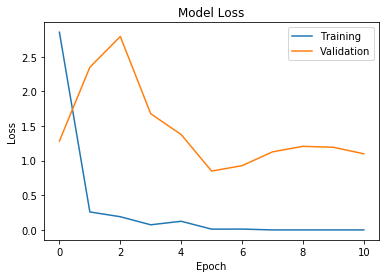

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Test
The output of the model is positive / negative number based on which class the image belongs to with the magnitude of the number being the confidence of the model

[[3.3809981]]
This item is Recyclable


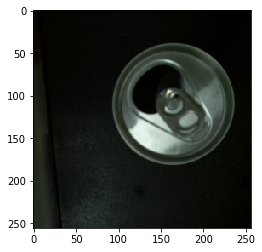

In [27]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\r\75.jpg')
x = np.array(img)
x = x.reshape(1,256,256,3)
answ = model.predict_on_batch(x/255)
imshow(img)
print(answ)
if(answ >= 0):
    print("This item is Recyclable")
else:
    print("This item is not Recyclable")

[[-8.246066]]
This item is not Recyclable


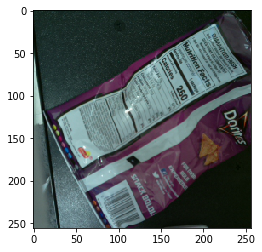

In [12]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\t\9.jpg')
x = np.array(img)
x = x.reshape(1,256,256,3)
answ = model.predict_on_batch(x/255)
imshow(img)
print(answ)
if(answ >= 0):
    print("This item is Recyclable")
else:
    print("This item is not Recyclable")

# Testing Accuracy

In [14]:
predict = model.predict_on_batch(x_test)

In [22]:
for i in range(len(predict)):
    if(predict[i][0] >= 0):
        predict[i][0] = 1
    else:
        predict[i][0] = -1

In [23]:
accuracy_score(y_test, predict)

0.734375

# Training Accuracy

In [24]:
predict2 = model.predict_on_batch(data)
for i in range(len(predict2)):
    if(predict2[i][0] >= 0):
        predict2[i][0] = 1
    else:
        predict2[i][0] = -1

In [25]:
accuracy_score(ans, predict2)

0.8267716535433071

# Save Model

In [26]:
model.save('trash_hinge_new.h5')